<a href="https://colab.research.google.com/github/Calima94/Dio_Desafio_Machine_Learning/blob/main/C%C3%B3pia_de_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1]:
%matplotlib inline

import os

#if using Theano with GPU
#os.environ["KERAS_BACKEND"] = "tensorflow"

import random
import numpy as np
import keras

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

from keras.preprocessing import image
from keras.applications.imagenet_utils import preprocess_input
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras.models import Model

from tensorflow.keras.preprocessing import image_dataset_from_directory


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras import layers

In [7]:
#!find . -type f -empty -delete

In [27]:
"""
import glob, os

magic_numbers = {'jpg': bytes([0xFF, 0xD8, 0xFF, 0xE0])}
max_read_size = max(len(m) for m in magic_numbers.values()) # get max size of magic numbers of the dict
os.chdir("/content/drive/MyDrive/kagglecatsanddogs_5340/PetImages/Dog")
acum = 0
for x in glob.glob("*jpg"):
    use = False
    with open(x, 'rb') as fd:
        file_head = fd.read()
        #print(file_head)

    if file_head.startswith(magic_numbers['jpg']):
        #print("yes")
        pass
    else:
        #print("no")
        os.remove(x)

"""

In [4]:
# https://www.tensorflow.org/tutorials/images/classification

batch_size = 32
img_height = 180
img_width = 180

data_dir = '/content/drive/MyDrive/kagglecatsanddogs_5340/PetImages'


In [5]:
train_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 23213 files belonging to 2 classes.
Using 18571 files for training.


In [6]:
val_ds = image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 23213 files belonging to 2 classes.
Using 4642 files for validation.


In [7]:
class_names = train_ds.class_names
print(class_names)

['Cat', 'Dog']


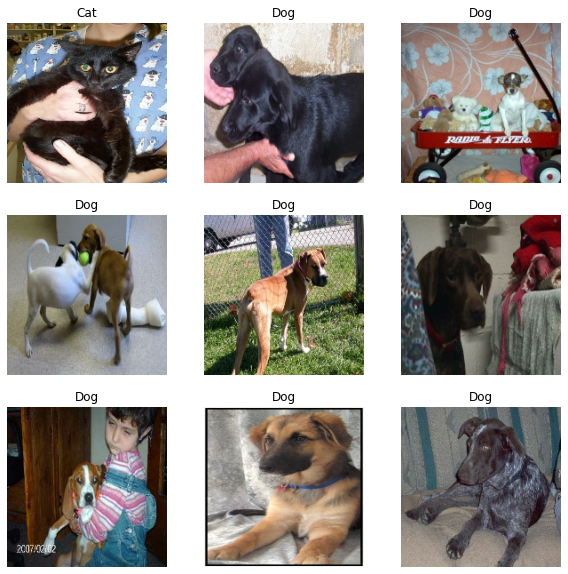

In [32]:
""""

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")
"""

In [8]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break


(32, 180, 180, 3)
(32,)


In [9]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)


In [10]:
normalization_layer = tf.keras.layers.Rescaling(1./255)

In [11]:
num_classes = len(class_names)
model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(img_height, img_width, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256))
model.add(Activation('relu'))

model.add(Dropout(0.5))

model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 activation (Activation)     (None, 178, 178, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 32)        9248      
                                                                 
 activation_1 (Activation)   (None, 87, 87, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 32)       0         
 2D)                                                    

In [11]:
"""

num_classes = 2

model = tf.keras.Sequential([
  tf.keras.layers.Rescaling(1./255),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Conv2D(32, 3, activation='relu'),
  tf.keras.layers.MaxPooling2D(),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(num_classes)
])
"""

In [17]:
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 90, 90, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [15]:
# compile the model to use categorical cross-entropy loss function and adadelta optimizer
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


In [14]:
epochs=3
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=3
)


Epoch 1/3


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


581/581 [==============================] - 86s 57ms/step - loss: 0.9015 - accuracy: 0.5134 - val_loss: 0.6904 - val_accuracy: 0.5472
Epoch 2/3
581/581 [==============================] - 18s 30ms/step - loss: 0.6900 - accuracy: 0.5257 - val_loss: 0.6891 - val_accuracy: 0.4897
Epoch 3/3
581/581 [==============================] - 17s 29ms/step - loss: 0.6891 - accuracy: 0.5343 - val_loss: 0.6859 - val_accuracy: 0.5500


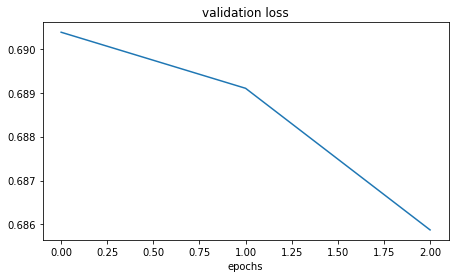

In [15]:
fig = plt.figure(figsize=(16,4))
ax = fig.add_subplot(121)
ax.plot(history.history["val_loss"])
ax.set_title("validation loss")
ax.set_xlabel("epochs")

plt.show()